In [15]:
import Preprocessing as pp
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import time
timestr = time.strftime("%Y-%m-%d_%H-%M")

In [2]:
temp_data_folder = "../Data/Temp_Data/"
image_path = "../Images/"
image_subfolder = "Surrogate_Model/"
image_folder = image_path + image_subfolder

pp.checkFolder(temp_data_folder)
pp.checkFolder(image_path)
pp.checkFolder(image_folder)

Folder already exists.
Folder already exists.
Creation of directory ../Images/Surrogate_Model/ successful.


In [5]:
kit_orange = pp.getColor('orange')
kit_green = pp.getColor('green')
kit_blue = pp.getColor('blue')
kit_cyan = pp.getColor('cyan')
kit_red = pp.getColor('red')
kit_lightgreen = pp.getColor('lightgreen')
kit_grey = pp.getColor('grey')

In [6]:
exp_4 = pp.openCSVFile('experiment_4b_short.csv', temp_data_folder)

In [12]:
exp_1 = pp.openCSVFile('experiment_1_short.csv', temp_data_folder)

In [120]:
xt = np.array(exp_4['input_voltage'][30:])
yt = np.array(exp_4['el_power'][30:])

In [88]:
from smt import surrogate_models as sm

model = sm.LS()
model.set_training_values(xt, yt)
model.train()

___________________________________________________________________________
   
                                    LS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10510
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0020001


In [89]:
xtest = np.array(exp_1['input_voltage'])
pred_1 = model.predict_values(xtest)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 9925
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


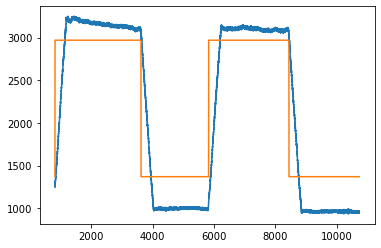

In [90]:
plt.plot(exp_1['time'], exp_1['el_power'])
plt.plot(exp_1['time'], pred_1)

In [91]:
diff_4 = exp_4.set_index('time').diff(30)

In [92]:
diff_1 = exp_1.set_index('time').diff(30)

In [99]:
dyt_dxt = np.array(diff_4['el_power'][30:])

In [100]:
dyv_dxv = np.array(diff_1['el_power'][30:])

In [101]:
xv = np.array(exp_1['input_voltage'][30:])
yv = np.array(exp_1['el_power'][30:])

In [113]:
g = sm.genn.GENN()
g.options["alpha"] = 0.5  # learning rate that controls optimizer step size
g.options["beta1"] = 0.9  # tuning parameter to control ADAM optimization
g.options["beta2"] = 0.99  # tuning parameter to control ADAM optimization
g.options[
    "lambd"
] = 0.1  # lambd = 0. = no regularization, lambd > 0 = regularization
g.options[
    "gamma"
] = 1.0  # gamma = 0. = no grad-enhancement, gamma > 0 = grad-enhancement
g.options["deep"] = 2  # number of hidden layers
g.options["wide"] = 2  # number of nodes per hidden layer
g.options[
    "mini_batch_size"
] = 1024  # used to divide data into training batches (use for large data sets)
g.options["num_epochs"] = 10  # number of passes through data
g.options[
    "num_iterations"
] = 100  # number of optimizer iterations per mini-batch
g.options["is_print"] = True  # print output (or not)
sm.genn.load_smt_data(
    g, xt, yt, dyt_dxt
)  # convenience function to read in data that is in SMT format

g.train()

___________________________________________________________________________
   
                                   GENN
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10510
   
___________________________________________________________________________
   
 Training
   
   Training ...
epoch = 0, mini-batch = 0, avg cost =  0.272
epoch = 0, mini-batch = 1, avg cost =  0.191
epoch = 0, mini-batch = 2, avg cost =  0.190
epoch = 0, mini-batch = 3, avg cost =  0.216
epoch = 0, mini-batch = 4, avg cost =  0.223
epoch = 0, mini-batch = 5, avg cost =  0.186
epoch = 0, mini-batch = 6, avg cost =  0.200
epoch = 0, mini-batch = 7, avg cost =  0.229
epoch = 0, mini-batch = 8, avg cost =  0.212
epoch = 0, mini-batch = 9, avg cost =  0.190
epoch = 0, mini-batch = 10, avg cost =  0.208
epoch = 1, mini-batch = 0, avg cost =  0.219
epoch = 1, mini-batch = 1, avg cost =  0.232
epoch = 1, mini-batch = 2, avg cost =  0.2

In [121]:
y_pred = g.predict_values(xv)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 9895
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009923
   
   Prediction time/pt. (sec) :  0.0000001
   


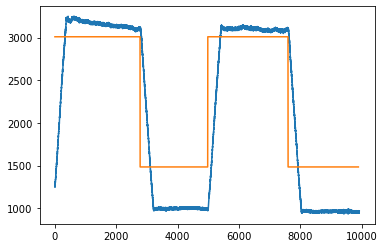

In [122]:
plt.plot(exp_1['el_power'])
plt.plot(y_pred)

In [136]:
exp_4['el_power'].astype(float)

0        1242.0
1        1246.0
2        1257.0
3        1257.0
4        1263.0
          ...  
10535    1162.0
10536    1160.0
10537    1183.0
10538    1198.0
10539    1201.0
Name: el_power, Length: 10540, dtype: float64

In [130]:
xt = np.array(exp_4['input_voltage'].astype(float))
yt = np.array([1200, 1637, 2509, 3300])

rbf = sm.RBF()
rbf.set_training_values(xt, yt)
rbf.train()

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (4 x 4 mtx) ...
         Performing LU fact. (4 x 4 mtx) - done. Time (sec):  0.0000000
      Initializing linear solver - done. Time (sec):  0.0000000
      Solving linear system (col. 0) ...
         Back solving (4 x 4 mtx) ...
         Back solving (4 x 4 mtx) - done. Time (sec):  0.0000000
      Solving linear system (col. 0) - done. Time (sec):  0.0000000
   Training - done. Time (sec):  0.0010014


___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


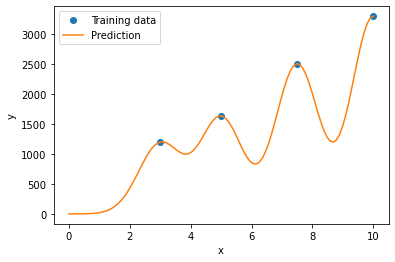

In [132]:
x = np.linspace(0.0, 10, num)
y = rbf.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()